In [67]:

import numpy as np
import datetime as dt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
# from mpl_toolkits.basemap import Basemap
import glob
from netCDF4 import Dataset
import copy
import gc

import os
import sys
sys.path.insert(0, '/Users/h/Github/geo_data_group/')
import grid_set as gs

import ant_plus
from imp import reload
reload(ant_plus)
reload(gs)

<module 'grid_set' from '/Users/h/Github/geo_data_group/grid_set.py'>

In [68]:
#$### map projection
m = ccrs.SouthPolarStereo()
proj_cart = ccrs.PlateCarree() 
f = plt.figure()
G= gs.grid_set(m)

ax = f.add_subplot(1,1,1,projection=m)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
G.set_grid_dxy(100e3,100e3,ax)
plt.close()


Got a grid res =  93  x  93
Note that all grid info is in nx x ny grids, whilst data is in nx x ny


In [86]:
# hist_bins = np.arange(-1.0,1.05,0.05)
hist_bins = np.linspace(-0.5,0.5,51)
plot_SLA_SIN_hist  = G.hist_bin_list(xA,#trackSIN.mean_sea_surf_20_ku_ANOM_LEGOS_GPOD_DTU15,
                            trackSIN.lon_20_ku[msk],trackSIN.lat_20_ku[msk],
                            hist_bins,xy_order=0)

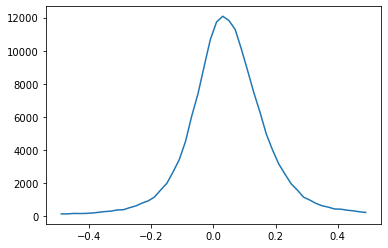

In [87]:
plt.plot(hist_bins[:-1] + np.diff(hist_bins)/2,np.nansum(plot_SLA_SIN_hist,axis=(0,1)))

In [3]:
# file = 'Example_Merge/Open_ocean_ANOM_2019-09-01T00-03_2019-09-03T23-26.nc'
# file = '/Users/h/PREMELT/Ant+/Comb_files_for_Stine/DOT_SLA_whole_anto_2019-03-01T00-40_2019-03-31T23-15.nc'
file = '/Users/h/PREMELT/Ant+/Comb_files_for_Stine/DOT_SLA_whole_anto_2019-09-01T00-03_2019-09-30T23-42.nc'
trackSAR=ant_plus.CS2_track(file,add_attr=True)
# track.print_time()

In [11]:
# file = 'Example_Merge/Open_ocean_ANOM_2019-09-01T00-03_2019-09-03T23-26.nc'
# file = '/Users/h/PREMELT/Ant+/Comb_files_for_Stine/DOT_SLA_whole_anto_2019-03-01T00-40_2019-03-31T23-15.nc'
file = '/Users/h/PREMELT/Ant+/LRM-SAR-SIN_comb/ST_and_range_ANOM_all_SARIN_2019-09-01T00-06_2019-09-30T23-41.nc'
trackSIN=ant_plus.CS2_track(file,add_attr=True)
# track.print_time()

In [5]:
# file = 'Example_Merge/Open_ocean_ANOM_2019-09-01T00-03_2019-09-03T23-26.nc'
# file = '/Users/h/PREMELT/Ant+/Comb_files_for_Stine/DOT_SLA_whole_anto_2019-03-01T00-40_2019-03-31T23-15.nc'
file = '/Users/h/PREMELT/Ant+/LRM-SAR-SIN_comb/ST_and_range_ANOM_all_LRM_2019-09-01T00-19_2019-09-30T23-45.nc'
trackLRM=ant_plus.CS2_track(file,add_attr=True)
# track.print_time()

In [6]:
### makes a directory for figures
fig_dir = file.split('T0')[0]
check_dir = os.path.dirname(fig_dir+'_SAR_SIN_comb/')
if not os.path.exists(check_dir):
    os.makedirs(check_dir)

In [13]:
trackSIN.list_vars()#['ANOM','flag',])

['time_20_ku',
 'lon_20_ku',
 'lat_20_ku',
 'range_1_20_ku',
 'flag_surf_type_class_20_ku',
 'height_1_20_ku',
 'mean_sea_surf_sea_ice_20_ku',
 'geoid_20_ku',
 'NSIDC_nasa',
 'atm_geo_corrections_sum_LEGOS_GPOD',
 'range_1_20_ku_ANOM_MSSL_D',
 'range_1_20_ku_ANOM_MSSL_S',
 'range_1_20_ku_ANOM_LEGOS_GPOD_All',
 'mean_sea_surf_20_ku_ANOM_LEGOS_GPOD_DTU15',
 'mean_sea_surf_20_ku_ANOM_LEGOS_GPOD_DTU21',
 'atm_geo_corrections_sum_ANOM_LEGOS_GPOD']

In [12]:
trackLRM.list_vars()#['ANOM','flag',])

['time_20_ku',
 'lon_20_ku',
 'lat_20_ku',
 'range_1_20_ku',
 'range_3_20_ku',
 'flag_surf_type_class_20_ku',
 'height_1_20_ku',
 'height_3_20_ku',
 'mean_sea_surf_sea_ice_20_ku',
 'geoid_20_ku',
 'NSIDC_nasa']

In [15]:
load_list = trackLRM.list_vars(['ANOM','flag','height','geoid','mean_sea_surf_sea_ice_20_ku'])
# load_list = track.list_vars(['mean_sea_surf_sea_ice_20_ku'])
trackLRM.add_vars(load_list)

In [16]:
load_list = trackSAR.list_vars(['ANOM','flag','height','geoid','mean_sea_surf_sea_ice_20_ku'])
# load_list = track.list_vars(['mean_sea_surf_sea_ice_20_ku'])
trackSAR.add_vars(load_list)

In [17]:
load_list = trackSIN.list_vars(['ANOM','flag','height','geoid','mean_sea_surf_sea_ice_20_ku'])
# load_list = track.list_vars(['mean_sea_surf_sea_ice_20_ku'])
trackSIN.add_vars(load_list)

In [18]:
# track.mean_sea_surf_20_ku_ANOM_DTU15_attr
# track.range_1_20_ku_ANOM_CLS_LEAD_attr
# track.flag_surf_type_class_20_ku_attr
trackSAR.mean_sea_surf_sea_ice_20_ku_attr

{'comment': 'Mean sea surface model, referenced to the WGS84 ellipsoid. This model has been optimised for use in computing the surface height anomaly of the polar oceans to derive sea-ice freeboard. The model is a merge of the CLS2011 mean sea-surface and CryoSat data from high latitudes.',
 'coordinates': 'lon_20_ku lat_20_ku',
 'institution': 'UCL',
 'long_name': 'mean sea surface height above reference ellipsoid',
 'source': 'UCL13',
 'standard_name': 'sea_surface_height_above_reference_ellipsoid',
 'units': 'm'}

In [20]:
trackLRM.range = '-'.join([
    ant_plus.CSt2dt(trackSAR.time_20_ku[0]).strftime('%Y%m%d'),
    ant_plus.CSt2dt(trackSAR.time_20_ku[-1]).strftime('%Y%m%d')])
trackLRM.range

'20190901-20190930'

In [21]:
trackSAR.range = '-'.join([
    ant_plus.CSt2dt(trackSAR.time_20_ku[0]).strftime('%Y%m%d'),
    ant_plus.CSt2dt(trackSAR.time_20_ku[-1]).strftime('%Y%m%d')])
trackSAR.range

'20190901-20190930'

In [22]:
trackSIN.range = '-'.join([
    ant_plus.CSt2dt(trackSIN.time_20_ku[0]).strftime('%Y%m%d'),
    ant_plus.CSt2dt(trackSIN.time_20_ku[-1]).strftime('%Y%m%d')])
trackSIN.range

'20190901-20190930'

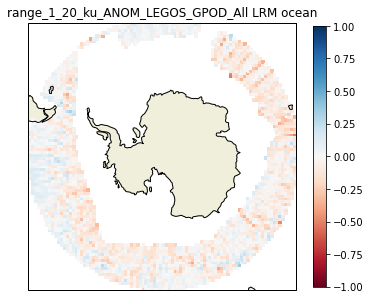

In [27]:
### recipe SLA
x = trackLRM.height_1_20_ku - trackLRM.mean_sea_surf_sea_ice_20_ku
#### options
hard_min = -10.0 ### extras to remove crazy outliers
hard_max =  10.0
h_min = -1.0
h_max =  1.0
### LRM - Ocean
#### anomaly ??
# v = 'range_1_20_ku_ANOM_ISat_2step'
# vSl = 'range_1_20_ku_ANOM_LEGOS_GPOD_All'
# xA = getattr(trackLRM,vSl).copy()
xA = x
#### masking - OCEAN
msk = trackLRM.flag_surf_type_class_20_ku ==  2
x[x.mask] = np.nan
msk[xA>hard_max] = 0
msk[xA<hard_min] = 0
xA = xA[msk]
plot_SLA_LRM_O  = G.bin_list(xA,#trackLRM.mean_sea_surf_20_ku_ANOM_LEGOS_GPOD_DTU15,
                            trackLRM.lon_20_ku[msk],trackLRM.lat_20_ku[msk],xy_order=0)
f = plt.figure(figsize=[6,6])
ax = f.add_subplot(1,1,1,projection=m)
ax.set_extent([-180, 180, -90, -50], proj_cart)
s = ax.pcolormesh(G.xpts,G.ypts,plot_SLA_LRM_O,
                 cmap = 'RdBu',vmin = h_min,vmax = h_max)
ax.set_title(vSl+' LRM ocean')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
plt.colorbar(s,shrink=0.8,pad=0.05)
plt.show()

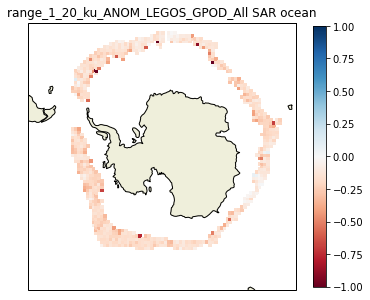

In [78]:
### recipe SLA
x = trackSAR.height_1_20_ku - trackSAR.mean_sea_surf_sea_ice_20_ku
#### options
hard_min = -10.0 ### extras to remove crazy outliers
hard_max =  10.0
h_min = -1.0
h_max =  1.0
### SAR - Ocean
#### anomaly ??
# v = 'range_1_20_ku_ANOM_ISat_2step'
vSl = 'range_1_20_ku_ANOM_LEGOS_GPOD_All'
xA = getattr(trackSAR,vSl).copy()
xA = x-xA
#### masking - OCEAN
msk = trackSAR.flag_surf_type_class_20_ku ==  64
x[x.mask] = np.nan
msk[xA>hard_max] = 0
msk[xA<hard_min] = 0
xA = xA[msk]
plot_SLA_SAR_O  = G.bin_list(xA,#trackSAR.mean_sea_surf_20_ku_ANOM_LEGOS_GPOD_DTU15,
                            trackSAR.lon_20_ku[msk],trackSAR.lat_20_ku[msk],xy_order=0)
f = plt.figure(figsize=[6,6])
ax = f.add_subplot(1,1,1,projection=m)
ax.set_extent([-180, 180, -90, -50], proj_cart)
s = ax.pcolormesh(G.xpts,G.ypts,plot_SLA_SAR_O,
                 cmap = 'RdBu',vmin = h_min,vmax = h_max)
ax.set_title(vSl+' SAR ocean')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
plt.colorbar(s,shrink=0.8,pad=0.05)
plt.show()

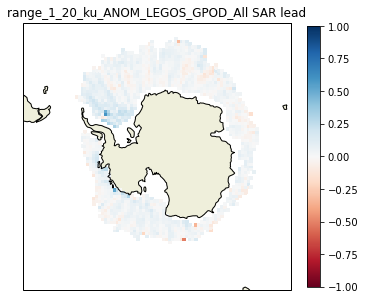

In [79]:
### recipe SLA
x = trackSAR.height_1_20_ku - trackSAR.mean_sea_surf_sea_ice_20_ku
#### options
hard_min = -10.0 ### extras to remove crazy outliers
hard_max =  10.0
h_min = -1.0
h_max =  1.0
### SAR - Lead
#### anomaly ??
# v = 'range_1_20_ku_ANOM_DTU_imp_th70'
vSo = 'range_1_20_ku_ANOM_LEGOS_GPOD_All'
xA = getattr(trackSAR,vSo).copy()
xA = x-xA
#### masking - LEADS
msk = trackSAR.flag_surf_type_class_20_ku == 256
x[x.mask] = np.nan
msk[xA>hard_max] = 0
msk[xA<hard_min] = 0
xA = xA[msk]
plot_SLA_SAR_L  = G.bin_list(xA,#trackSAR.mean_sea_surf_20_ku_ANOM_LEGOS_GPOD_DTU15,
                            trackSAR.lon_20_ku[msk],trackSAR.lat_20_ku[msk],xy_order=0)
f = plt.figure(figsize=[6,6])
ax = f.add_subplot(1,1,1,projection=m)
ax.set_extent([-180, 180, -90, -50], proj_cart)
s = ax.pcolormesh(G.xpts,G.ypts,plot_SLA_SAR_L,
                 cmap = 'RdBu',vmin = h_min,vmax = h_max)
ax.set_title(vSo+' SAR lead')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
plt.colorbar(s,shrink=0.8,pad=0.05)
plt.show()

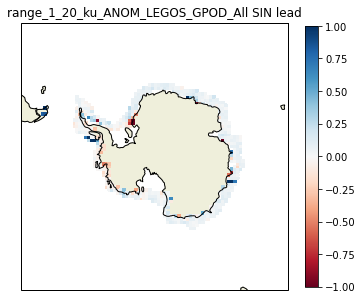

In [80]:
### recipe SLA
x = trackSIN.height_1_20_ku - trackSIN.mean_sea_surf_sea_ice_20_ku
#### options
hard_min = -10.0 ### extras to remove crazy outliers
hard_max =  10.0
h_min = -1.0
h_max =  1.0
### SIN - Lead
#### anomaly ??
vSIN = 'range_1_20_ku_ANOM_LEGOS_GPOD_All'
xA = getattr(trackSIN,vSIN).copy()
xA = x-xA
#### masking - LEADS
msk = trackSIN.flag_surf_type_class_20_ku == 272
x[x.mask] = np.nan
msk[xA>hard_max] = 0
msk[xA<hard_min] = 0
xA = xA[msk]
plot_SLA_SIN_L  = G.bin_list(xA,#trackSIN.mean_sea_surf_20_ku_ANOM_LEGOS_GPOD_DTU15,
                            trackSIN.lon_20_ku[msk],trackSIN.lat_20_ku[msk],xy_order=0)
f = plt.figure(figsize=[6,6])
ax = f.add_subplot(1,1,1,projection=m)
ax.set_extent([-180, 180, -90, -50], proj_cart)
s = ax.pcolormesh(G.xpts,G.ypts,plot_SLA_SIN_L,
                 cmap = 'RdBu',vmin = h_min,vmax = h_max)
ax.set_title(vSIN+' SIN lead')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
plt.colorbar(s,shrink=0.8,pad=0.05)
plt.show()

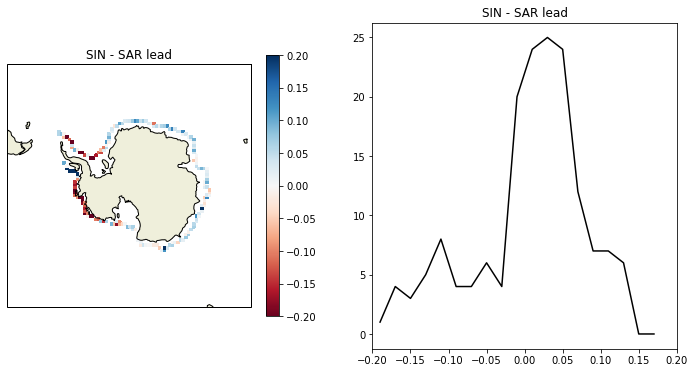

In [81]:
h_min = -0.2
h_max =  0.2
f = plt.figure(figsize=[12,6])
ax = f.add_subplot(1,2,1,projection=m)
ax.set_extent([-180, 180, -90, -50], proj_cart)
s = ax.pcolormesh(G.xpts,G.ypts,plot_SLA_SIN_L-plot_SLA_SAR_L,
                 cmap = 'RdBu',vmin = h_min,vmax = h_max)
ax.set_title('SIN - SAR lead')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
plt.colorbar(s,shrink=0.8,pad=0.05)

##### HISTOGRAM
bin_no = 20
h_bins = np.arange(h_min,h_max,(h_max-h_min)/bin_no)
hist = np.histogram(plot_SLA_SIN_L-plot_SLA_SAR_L,bins=h_bins)[0]
ax = f.add_subplot(1,2,2)
ax.plot(h_bins[:-1] + np.diff(h_bins)/2,hist,'-k')
ax.set_xlim([h_min,h_max])
ax.set_title('SIN - SAR lead')
plt.show()
f.savefig(fig_dir+vSIN+'_to_'+vSl+'.png',bbox_inches='tight')

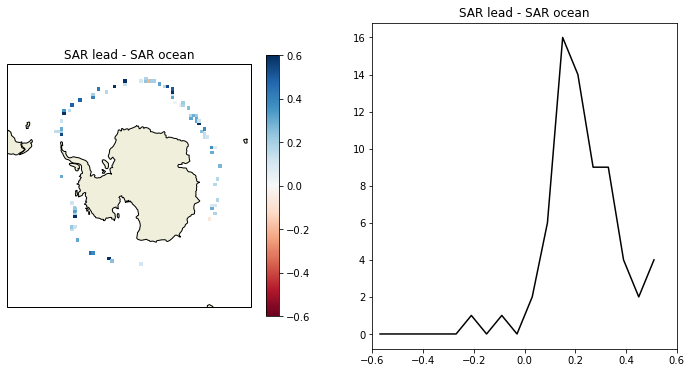

In [82]:
h_min = -0.6
h_max =  0.6
f = plt.figure(figsize=[12,6])
ax = f.add_subplot(1,2,1,projection=m)
ax.set_extent([-180, 180, -90, -50], proj_cart)
s = ax.pcolormesh(G.xpts,G.ypts,plot_SLA_SAR_L-plot_SLA_SAR_O,
                 cmap = 'RdBu',vmin = h_min,vmax = h_max)
ax.set_title('SAR lead - SAR ocean')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
plt.colorbar(s,shrink=0.8,pad=0.05)

##### HISTOGRAM
bin_no = 20
h_bins = np.arange(h_min,h_max,(h_max-h_min)/bin_no)
hist = np.histogram(plot_SLA_SAR_L-plot_SLA_SAR_O,bins=h_bins)[0]
ax = f.add_subplot(1,2,2)
ax.plot(h_bins[:-1] + np.diff(h_bins)/2,hist,'-k')
ax.set_xlim([h_min,h_max])
ax.set_title('SAR lead - SAR ocean')
plt.show()
f.savefig(fig_dir+vSl+'_to_'+vSo+'.png',bbox_inches='tight')

In [121]:
trackSAR.flag_surf_type_20_ku_LEGOS_GPOD_attr
# trackSAR.flag_surf_type_class_20_ku_attr

{'coordinates': 'lon_20_ku lat_20_ku',
 'flag_values': '0b, 1b, 2b , 3b',
 'flag_meanings': 'unknown/mixed ocean sea_ice lead',
 'long_name': 'surface type flag',
 'comment': 'A 4-state surface type mask for Cryosat2 data from the LEGOS GPOD along track data.Flag file converted from the three original supplied flag files: flag_floes_meas_valid_20hz,flag_leads_meas_valid_20hz,flag_open_ocean_meas_valid_20h'}

In [102]:
trackinfo = [
    {"Name":'LRM',"track":trackLRM,"mask_no":2,"Cases":['Default_L2','height_3']},
    {"Name":'SAR_O',"track":trackSAR,"mask_no":64,"Cases":['Default_L2']},
    {"Name":'SAR_L',"track":trackSAR,"mask_no":256,"Cases":['Default_L2']},
    {"Name":'SARIN',"track":trackSIN,"mask_no":272,"Cases":['Default_L2']},
]

In [135]:
### saving everthing SLA
### map for each - put it on the class - Grid
### for each anomaly, make SLA map, save as SLA_map_(var_name)
# G.var_list = []
for TI in trackinfo:
    msk = TI['track'].flag_surf_type_class_20_ku == TI['mask_no']
    pvars = [v for v in TI['track'].vars if 'ANOM' in v] + TI["Cases"]
#     pvars =  TI["Cases"]
#     v = pvars[-2]
    for v in pvars:
#         if 'GPOD' not in v: continue
        x = TI['track'].height_1_20_ku - TI['track'].mean_sea_surf_sea_ice_20_ku
        if 'Default' in v:
            xA = x.copy()
        elif 'height_3' in v:
            x = TI['track'].height_3_20_ku - TI['track'].mean_sea_surf_sea_ice_20_ku
            xA = x.copy()
        else:
            xA = x - getattr(TI['track'],v).copy()
        if 'CLS' in v:
            #### set CLS mask
            if TI['mask_no']==64: CLSmsk = 1 ## ocean
            if TI['mask_no']==256: CLSmsk = 3 ## lead
            msk = TI["track"].flag_surf_type_20_ku_CLS == CLSmsk
        if 'GPOD' in v and 'SAR_' in TI['Name']: ### only for SAR mode
            #### set GPOD mask
            if TI['mask_no']==64: CLSmsk = 1 ## ocean
            if TI['mask_no']==256: CLSmsk = 3 ## lead
            msk = TI["track"].flag_surf_type_20_ku_LEGOS_GPOD == CLSmsk
        hard_min = -10.0 ### extras to remove crazy outliers
        hard_max =  10.0
        xA[xA.mask] = np.nan
        msk[xA>hard_max] = 0
        msk[xA<hard_min] = 0
        xA = xA[msk]
        plot_bin_temp  = G.bin_list(xA,#trackSIN.mean_sea_surf_20_ku_ANOM_LEGOS_GPOD_DTU15,
                                    TI['track'].lon_20_ku[msk],TI['track'].lat_20_ku[msk],xy_order=0)
        bin_var = '_'.join([TI['Name'],'SLA_bin',v])
        G.var_list.append(bin_var)
        print(bin_var)
        setattr(G,bin_var,plot_bin_temp.copy())

SARIN_SLA_bin_Default_L2


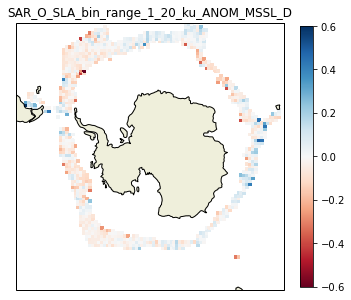

In [136]:
vb = G.var_list[7]
plot_bin_temp = getattr(G,vb).copy()
f = plt.figure(figsize=[6,6])
ax = f.add_subplot(1,1,1,projection=m)
ax.set_extent([-180, 180, -90, -50], proj_cart)
s = ax.pcolormesh(G.xpts,G.ypts,plot_bin_temp,
                 cmap = 'RdBu',vmin = h_min,vmax = h_max)
ax.set_title(vb)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
plt.colorbar(s,shrink=0.8,pad=0.05)
plt.show()

In [183]:
# [v.split('ANOM_')[1] for v in G.var_list if 'SAR_O' in v and 'range' in v]
[v for v in G.var_list if 'SARIN' in v ]

['SARIN_SLA_bin_range_1_20_ku_ANOM_MSSL_D',
 'SARIN_SLA_bin_range_1_20_ku_ANOM_MSSL_S',
 'SARIN_SLA_bin_range_1_20_ku_ANOM_LEGOS_GPOD_All',
 'SARIN_SLA_bin_mean_sea_surf_20_ku_ANOM_LEGOS_GPOD_DTU15',
 'SARIN_SLA_bin_mean_sea_surf_20_ku_ANOM_LEGOS_GPOD_DTU21',
 'SARIN_SLA_bin_atm_geo_corrections_sum_ANOM_LEGOS_GPOD',
 'SARIN_SLA_bin_Default_L2']

In [175]:
FIG_DIR  = '/Users/h/PREMELT/Ant+/LRM-SAR-SIN_comb/All_modes_SLA_bin_'+trackinfo[0]['track'].range+'/'
check_dir = os.path.dirname(FIG_DIR)
if not os.path.exists(check_dir):
    os.makedirs(check_dir)

In [168]:
f = plt.figure(figsize=(8,8))
# Base_list = ['LRM_SLA_bin_Default_L2']
Base_list = [v for v in G.var_list if 'LRM' in v]
Test_list = ['SAR_O_SLA_bin_Default_L2']+[v for v in G.var_list if 'SAR_O' in v and 'range' in v]
Base_list,Test_list

(['LRM_SLA_bin_Default_L2', 'LRM_SLA_bin_height_3'],
 ['SAR_O_SLA_bin_Default_L2',
  'SAR_O_SLA_bin_range_1_20_ku_ANOM_ISat_2step',
  'SAR_O_SLA_bin_range_1_20_ku_ANOM_ISat_SWH_MSSfixed_Ice',
  'SAR_O_SLA_bin_range_1_20_ku_ANOM_DTU_imp_th70',
  'SAR_O_SLA_bin_range_1_20_ku_ANOM_DTU_th70',
  'SAR_O_SLA_bin_range_1_20_ku_ANOM_DTU_gauss',
  'SAR_O_SLA_bin_range_1_20_ku_ANOM_MSSL_D',
  'SAR_O_SLA_bin_range_1_20_ku_ANOM_MSSL_S',
  'SAR_O_SLA_bin_range_1_20_ku_ANOM_LEGOS_GPOD_All',
  'SAR_O_SLA_bin_range_1_20_ku_ANOM_CLS'])

<Figure size 576x576 with 0 Axes>

In [177]:
f = plt.figure(figsize=(8,8))
# Base_list = ['LRM_SLA_bin_Default_L2']
Base_list = [v for v in G.var_list if 'LRM' in v]
Test_list = [
    'SAR_O_SLA_bin_range_1_20_ku_ANOM_ISat_2step',
    'SAR_O_SLA_bin_range_1_20_ku_ANOM_DTU_imp_th70',
    'SAR_O_SLA_bin_range_1_20_ku_ANOM_LEGOS_GPOD_All',
]
Base_list,Test_list

(['LRM_SLA_bin_Default_L2', 'LRM_SLA_bin_height_3'],
 ['SAR_O_SLA_bin_range_1_20_ku_ANOM_ISat_2step',
  'SAR_O_SLA_bin_range_1_20_ku_ANOM_DTU_imp_th70',
  'SAR_O_SLA_bin_range_1_20_ku_ANOM_LEGOS_GPOD_All'])

<Figure size 576x576 with 0 Axes>

In [187]:
f = plt.figure(figsize=(8,8))
# Base_list = ['LRM_SLA_bin_Default_L2']
Base_list = [
    'SAR_O_SLA_bin_Default_L2',
    'SAR_L_SLA_bin_range_1_20_ku_ANOM_ISat_2step',
    'SAR_L_SLA_bin_range_1_20_ku_ANOM_DTU_imp_th70',
    'SAR_L_SLA_bin_range_1_20_ku_ANOM_LEGOS_GPOD_All',
]
Test_list = [
    'SAR_L_SLA_bin_Default_L2',
    'SAR_O_SLA_bin_range_1_20_ku_ANOM_ISat_2step',
    'SAR_O_SLA_bin_range_1_20_ku_ANOM_DTU_imp_th70',
    'SAR_O_SLA_bin_range_1_20_ku_ANOM_LEGOS_GPOD_All',
]
Base_list,Test_list

(['SAR_O_SLA_bin_Default_L2',
  'SAR_L_SLA_bin_range_1_20_ku_ANOM_ISat_2step',
  'SAR_L_SLA_bin_range_1_20_ku_ANOM_DTU_imp_th70',
  'SAR_L_SLA_bin_range_1_20_ku_ANOM_LEGOS_GPOD_All'],
 ['SAR_L_SLA_bin_Default_L2',
  'SAR_O_SLA_bin_range_1_20_ku_ANOM_ISat_2step',
  'SAR_O_SLA_bin_range_1_20_ku_ANOM_DTU_imp_th70',
  'SAR_O_SLA_bin_range_1_20_ku_ANOM_LEGOS_GPOD_All'])

<Figure size 576x576 with 0 Axes>

In [185]:
f = plt.figure(figsize=(8,8))
# Base_list = ['LRM_SLA_bin_Default_L2']
Base_list = [
    'SAR_L_SLA_bin_Default_L2',
    'SAR_L_SLA_bin_range_1_20_ku_ANOM_ISat_2step',
    'SAR_L_SLA_bin_range_1_20_ku_ANOM_DTU_imp_th70',
    'SAR_L_SLA_bin_range_1_20_ku_ANOM_LEGOS_GPOD_All',
]
Test_list = [
    'SARIN_SLA_bin_Default_L2',
    'SARIN_SLA_bin_range_1_20_ku_ANOM_MSSL_D',
    'SARIN_SLA_bin_range_1_20_ku_ANOM_MSSL_S',
    'SARIN_SLA_bin_range_1_20_ku_ANOM_LEGOS_GPOD_All',
]
Base_list,Test_list

(['SAR_L_SLA_bin_Default_L2',
  'SAR_L_SLA_bin_range_1_20_ku_ANOM_ISat_2step',
  'SAR_L_SLA_bin_range_1_20_ku_ANOM_DTU_imp_th70',
  'SAR_L_SLA_bin_range_1_20_ku_ANOM_LEGOS_GPOD_All'],
 ['SARIN_SLA_bin_Default_L2',
  'SARIN_SLA_bin_range_1_20_ku_ANOM_MSSL_D',
  'SARIN_SLA_bin_range_1_20_ku_ANOM_MSSL_S',
  'SARIN_SLA_bin_range_1_20_ku_ANOM_LEGOS_GPOD_All'])

<Figure size 576x576 with 0 Axes>

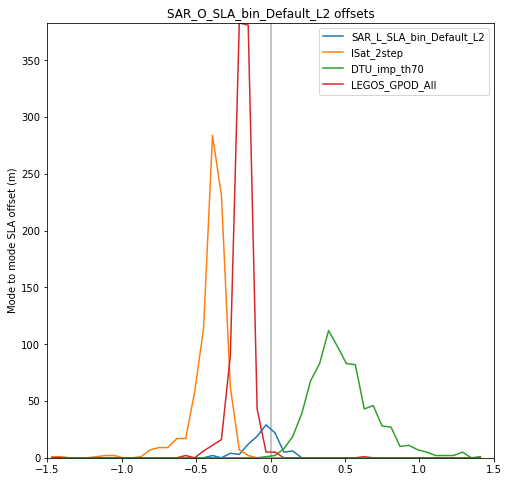

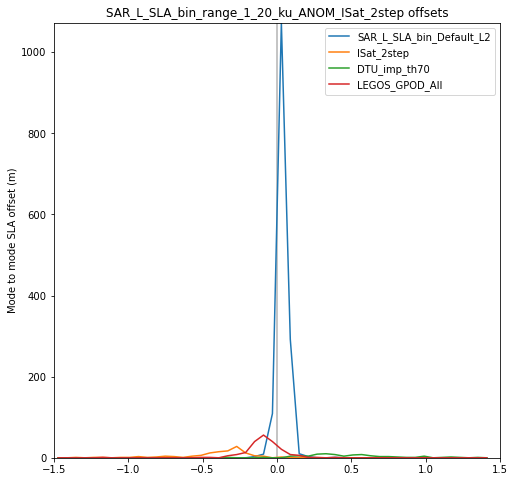

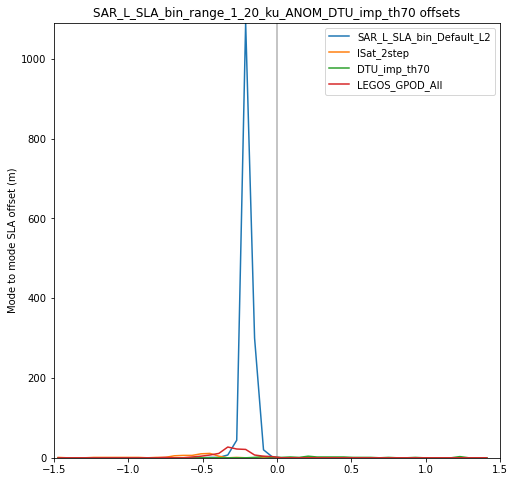

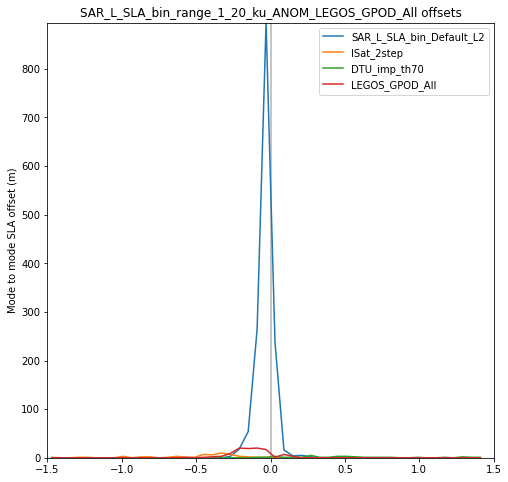

In [188]:
bl = Base_list[0]
for bl in Base_list:
    f = plt.figure(figsize=(8,8))
    ax = f.add_subplot(1,1,1)
    ax.set_title(bl+' offsets')
    plot_bin_base = getattr(G,bl).copy()
    h_min = -1.5
    h_max =  1.5
    bin_no = 50
    h_bins = np.arange(h_min,h_max,(h_max-h_min)/bin_no)
    ax.axvline([0.0],color='k',alpha = 0.3)
    ax.set_xlim([h_min,h_max])
    # tl = Test_list[0]
    minmax = [0.0,0.0]
    for tl in Test_list:
        plot_bin_test = getattr(G,tl).copy()
        hist = np.histogram(plot_bin_test-plot_bin_base,bins=h_bins)[0]
        try:
            tstr = tl.split('ANOM_')[1]
        except IndexError:
            tstr = tl
        ax.plot(h_bins[:-1] + np.diff(h_bins)/2,hist,label = tstr)
        minmax[1] = np.maximum(minmax[1],np.nanmax(hist))
    ax.set_ylim(minmax)
    ax.set_ylabel('Mode to mode SLA offset (m)')
    ax.legend()
#     f.savefig(FIG_DIR+bl+'_offsets.pdf',bbox_inches='tight')
    plt.show()

In [144]:
[v for v in G.var_list if 'LRM' in v]

['LRM_SLA_bin_Default_L2', 'LRM_SLA_bin_height_3']

In [137]:
trackinfo[0]['track'].range

'20190901-20190930'

In [142]:
### save netcdf
nc_name = '/Users/h/PREMELT/Ant+/LRM-SAR-SIN_comb/All_modes_SLA_bin_'+trackinfo[0]['track'].range+'.nc'
f_nc = Dataset(nc_name, mode='w')

# Create the dimensions of the file
# this is time_20_ku
f_nc.createDimension('x', G.m)
f_nc.createDimension('y', G.n)

# Copy the global attributes
Fattr = {
    'Description':'CSAO binned SLA',
    'CSAO_code_by':'HDBS Heorton',
}
f_nc.setncatts(Fattr)

# Create the variables in the file

## lon/lat and all
for v in ['lons','lats']+G.var_list:
    fill_var = getattr(G,v)
    f_nc.createVariable(v, fill_var.dtype, ('x','y'))
    # Fill it
    f_nc.variables[v][:] = fill_var

# Save the file
f_nc.close()


In [39]:
testa  = np.zeros([8,10,12])
for i in range(testa.shape[2]):
    testa[:,:,i] = i
testa.shape,np.flipud(testa).shape

((8, 10, 12), (8, 10, 12))

In [41]:
testa[0,0,:],np.flipud(testa)[0,0,:]

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]))

In [33]:
for v in trackSAR.vars:
    if 'range' in v and 'ANOM' in v:
#     if 'range' in v and 'ISat' in v:
#     if 'geoi' in v:
#     if 'ANOM' in v:
        print('-----')
        print(v)
        print('-----')
        if hasattr(trackSAR,v+'_attr'):
            attr = getattr(trackSAR,v+'_attr')
            for key, value in attr.items():
                print(key, ' : ', value)
        x = copy.copy(getattr(trackSAR,v))
        if type(x.mask) == np.ndarray:
            x[x.mask] = np.nan
        print('Distribution of '+v+' = '+' , '.join('{:.3}'.format(pc) for pc in np.nanpercentile(x,[25,50,75])))

-----
range_1_20_ku_ANOM_ISat_2step
-----
Description  :  Anomaly from L2 range to _ISat_2step retracker range
coordinates  :  lon_poca_20_ku lat_poca_20_ku
Units  :  m
Distribution of range_1_20_ku_ANOM_ISat_2step = 0.0959 , 0.188 , 0.304
-----
range_1_20_ku_ANOM_ISat_SWH_MSSfixed_Ice
-----
Description  :  Anomaly from L2 range to _ISat_SWH_MSSfixed_Ice retracker range
coordinates  :  lon_poca_20_ku lat_poca_20_ku
Units  :  m
Distribution of range_1_20_ku_ANOM_ISat_SWH_MSSfixed_Ice = -0.142 , 0.0368 , 0.292
-----
range_1_20_ku_ANOM_DTU_imp_th70
-----
Description  :  Anomaly from L2 range to _DTU_imp_th70 retracker range
coordinates  :  lon_poca_20_ku lat_poca_20_ku
Units  :  m
Distribution of range_1_20_ku_ANOM_DTU_imp_th70 = -0.492 , -0.239 , -0.185
-----
range_1_20_ku_ANOM_DTU_th70
-----
Description  :  Anomaly from L2 range to _DTU_th70 retracker range
coordinates  :  lon_poca_20_ku lat_poca_20_ku
Units  :  m
Distribution of range_1_20_ku_ANOM_DTU_th70 = -0.00793 , 0.0485 , 0.106
-

In [34]:
for v in trackSIN.vars:
    if 'range' in v and 'ANOM' in v:
#     if 'range' in v and 'ISat' in v:
#     if 'geoi' in v:
#     if 'ANOM' in v:
        print('-----')
        print(v)
        print('-----')
        if hasattr(trackSIN,v+'_attr'):
            attr = getattr(trackSIN,v+'_attr')
            for key, value in attr.items():
                print(key, ' : ', value)
        x = copy.copy(getattr(trackSIN,v))
        if type(x.mask) == np.ndarray:
            x[x.mask] = np.nan
        print('Distribution of '+v+' = '+' , '.join('{:.3}'.format(pc) for pc in np.nanpercentile(x,[25,50,75])))

-----
range_1_20_ku_ANOM_MSSL_D
-----
Description  :  Anomaly from L2 range to _MSSL_D retracker range
coordinates  :  lon_poca_20_ku lat_poca_20_ku
Units  :  m
Distribution of range_1_20_ku_ANOM_MSSL_D = -0.101 , -0.056 , -0.021
-----
range_1_20_ku_ANOM_MSSL_S
-----
Description  :  Anomaly from L2 range to _MSSL_S retracker range
coordinates  :  lon_poca_20_ku lat_poca_20_ku
Units  :  m
Distribution of range_1_20_ku_ANOM_MSSL_S = 0.144 , 0.236 , 0.439
-----
range_1_20_ku_ANOM_LEGOS_GPOD_All
-----
Description  :  Anomaly from L2 range to _LEGOS_GPOD_All retracker range
coordinates  :  lon_poca_20_ku lat_poca_20_ku
Units  :  m
Distribution of range_1_20_ku_ANOM_LEGOS_GPOD_All = 0.011 , 0.297 , 2.39
